In [208]:
ub_zbiornik = 0.000025 / (3 ** (1/2)) # l
ub_czas = 0.5 / (3 ** (1/2)) # s
ub_manometru_l = 0.001 / (3 ** (1/2)) # m
ub_manometru_t = 1000 / (3 ** (1/2)) # Pa

n = 5
d = 0.003
l = 0.400
ro = 997
A = 3.14 * d * d / 4

h1 = [0.21, 0.22, 0.23, 0.24, 0.27]
h2 = [0.19, 0.17, 0.15, 0.14, 0.10]
p_l = [ro * 9.81 * h1[i] - h2[i] for i in range(n)]
Vlm_l = [75, 110, 130, 125, 160]
V_l = [v / 1000000 for v in Vlm_l]
t_l = [43, 33, 31, 26, 27]



p_t_b = [0.10, 0.15, 0.16, 0.10, 0.15]
p_t = [p * 10**5 for p in p_t_b]
Vtml = [150, 190, 220, 160, 200]
V_t = [v / 1000000 for v in Vtml]
t_t = [8, 8, 9, 8, 8]


Przep_l = [V_l[i]/t_l[i] for i in range(n)]
Przep_t = [V_t[i]/t_t[i] for i in range(n)]

v_l = [Przep_l[i]/A for i in range(n)]
v_t = [Przep_t[i]/A for i in range(n)]

lambda_l = [2*d*p_l[i] / l / ro / v_l[i] / v_l[i] for i in range(n)]
lambda_t = [2*d*p_t[i] / l / ro / v_t[i] / v_t[i] for i in range(n)]

Re_l = [64 / lambda_l[i] for i in range(n)]
Re_t = [(0.3164/lambda_t[i])**4 for i in range(n)]

In [254]:
def uPrzeplywu(V, t):
    return ((1/t * ub_zbiornik)**2 + (-V*ub_czas/t**2)**2) ** (1/2)

def uPredkosci(Vb):
    return 1/A * Vb

def uCisnienL(uh):
    return 9.81 * ro * uh

def uLambd(dp, v, udp, uv):
    return ((2 * d * udp / l / ro / v/v)**2 + (-4*d*dp*uv/l/ro/v/v/v)**2) ** (1/2)

def uReL(l, ul):
    return 64*ul/l/l

def uReT(l, ul):
    return 0.3164**4 * 4 * ul / (l ** 5)

In [255]:
niepewnosci_przeplywu_l = [uPrzeplywu(V_l[i], t_l[i]) for i in range(n)]
niepewnosci_przeplywu_t = [uPrzeplywu(V_t[i], t_t[i]) for i in range(n)]

niepewnosci_predkosci_l = [uPredkosci(niepewnosci_przeplywu_l[i]) for i in range(n)]
niepewnosci_predkosci_t = [uPredkosci(niepewnosci_przeplywu_t[i]) for i in range(n)]

niepewnosci_cisnien_l = [uCisnienL(ub_manometru_l) for i in range(n)]
niepewnosci_cisnien_t = [ub_manometru_t for i in range(n)]

niepewnosci_lambd_l = [uLambd(p_l[i], v_l[i], niepewnosci_cisnien_l[i], niepewnosci_predkosci_l[i]) for i in range(n)]
niepewnosci_lambd_t = [uLambd(p_t[i], v_t[i], niepewnosci_cisnien_t[i], niepewnosci_predkosci_t[i]) for i in range(n)]

niepewnosci_re_l = [uReL(lambda_l[i], niepewnosci_lambd_l[i]) for i in range(5)]
niepewnosci_re_t = [uReT(lambda_t[i], niepewnosci_lambd_t[i]) for i in range(5)]

print(p_t)
print(niepewnosci_cisnien_t)


[10000.0, 15000.0, 16000.0, 10000.0, 15000.0]
[577.3502691896258, 577.3502691896258, 577.3502691896258, 577.3502691896258, 577.3502691896258]


In [64]:
### RUROCIĄG

przeplyw = 0.25 # m^3/s
l_rurociagu = 35000 # m
d_rurociagu = 0.3 # m
T_rurociagu = 100 # st.C
A_rurociagu = 3.14 * d_rurociagu ** 2 / 4
v_rurociagu = przeplyw / A_rurociagu # m/s
gestosc_ropy = 840.0  # kg/m^3
lepkosc_ropy = 0.017180 # Pa*s
Dh = 4 * A_rurociagu / 3.14 * d_rurociagu
Re_rurociagu = gestosc_ropy * v_rurociagu * Dh / lepkosc_ropy
lambda_rurociagu = 0.3164 / (Re_rurociagu ** (1/4))
dp_rurociagu = lambda_rurociagu * l_rurociagu * gestosc_ropy * v_rurociagu ** 2 / 2 / d_rurociagu
sprawnosc_pompy = 0.7
moc_pompy = przeplyw * dp_rurociagu / sprawnosc_pompy

print(moc_pompy)



8386259.0815167


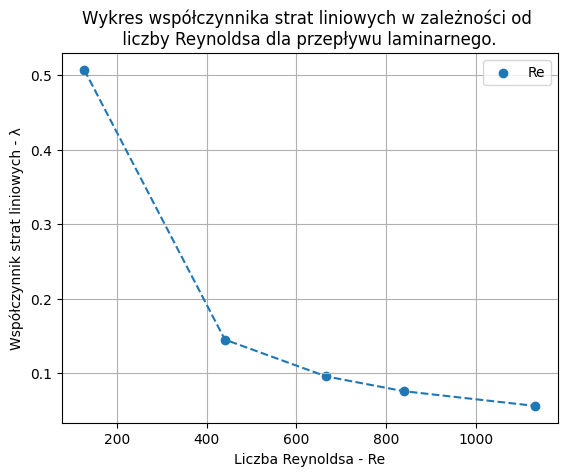

In [164]:
import matplotlib.pyplot as plt

plt.title("Wykres współczynnika strat liniowych w zależności od \n liczby Reynoldsa dla przepływu laminarnego. ", loc = 'center')
plt.xlabel("Liczba Reynoldsa - Re")
plt.ylabel("Współczynnik strat liniowych - λ")
plt.grid()
plt.scatter(Re_l, lambda_l)
plt.plot(Re_l, lambda_l, linestyle='dashed')
plt.legend(['Re']) 


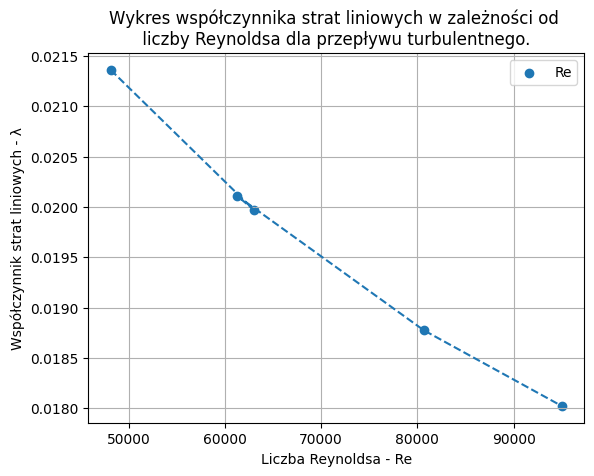

In [230]:
import matplotlib.pyplot as plt

plt.title("Wykres współczynnika strat liniowych w zależności od \n liczby Reynoldsa dla przepływu turbulentnego. ", loc = 'center')
plt.xlabel("Liczba Reynoldsa - Re")
plt.ylabel("Współczynnik strat liniowych - λ")
plt.grid()
plt.scatter(Re_t, lambda_t)
plt.plot(Re_t, lambda_t, linestyle='dashed')
plt.legend(['Re']) 
